In [4]:
%pip install tensorflow
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl (385.0 MB)
Note: you may need to restart the kernel to use updated packages.
TensorFlow version: 2.17.0


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [11]:
df = pd.read_csv('data/transformed_dfs/Proposicoes_2013_2024.csv')
colunas = df.columns.tolist()

In [12]:
contagem_por_ano = df.groupby(['ano', 'VirouLei']).size().unstack()
contagem_por_ano['percentual'] = (contagem_por_ano[1] / (contagem_por_ano[0] + contagem_por_ano[1])) * 100
print(contagem_por_ano)

VirouLei     0    1  percentual
ano                            
2013       880   58    6.183369
2014       524   48    8.391608
2015      1356  121    8.192282
2016       860   68    7.327586
2017       779   75    8.782201
2018       493   42    7.850467
2019       518  116   18.296530
2020      1044   88    7.773852
2021       515   70   11.965812
2022       127   34   21.118012
2023       191   37   16.228070
2024        11   11   50.000000


### Testando com Random Under Sampling 
(redução da classe de dados majoritária: Não virou lei)

In [18]:
X = df[colunas[5:-2]]
y = df[colunas[-1]]

undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X, y)

y_resampled.value_counts()


VirouLei
0    768
1    768
Name: count, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#criando camadas
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))  # Camada de entrada e primeira camada oculta
model.add(Dense(5, activation='relu'))  # Segunda camada oculta
model.add(Dense(1, activation='sigmoid'))  # Camada de saída (para classificação binária)

#compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10, verbose=1)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50
646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8098 - loss: 0.4750 - val_accuracy: 0.9033 - val_loss: 0.3107
Epoch 2/50
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - loss: 0.3174 - val_accuracy: 0.9033 - val_loss: 0.3077
Epoch 3/50
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9015 - loss: 0.3161 - val_accuracy: 0.9033 - val_loss: 0.3067
Epoch 4/50
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9004 - loss: 0.3182 - val_accuracy: 0.9033 - val_loss: 0.3086
Epoch 5/50
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9000 - loss: 0.3184 - val_accuracy: 0.9033 - val_loss: 0.3064
Epoch 6/50
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9060 - loss: 0.3025 - val_accuracy: 0.9033 - val_loss: 0.3066
Epoch 7/50
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9108 - loss: 0.2928 - val_accuracy: 0.9033 - val_loss: 0.3056
Epoch 8/50
646/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9101 - loss: 0.2967 - val_accuracy: 0.

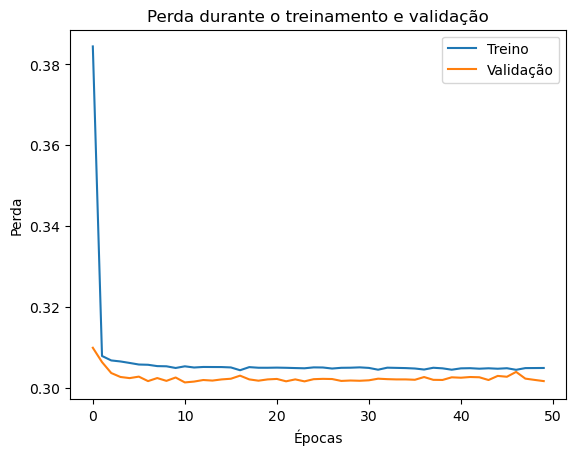

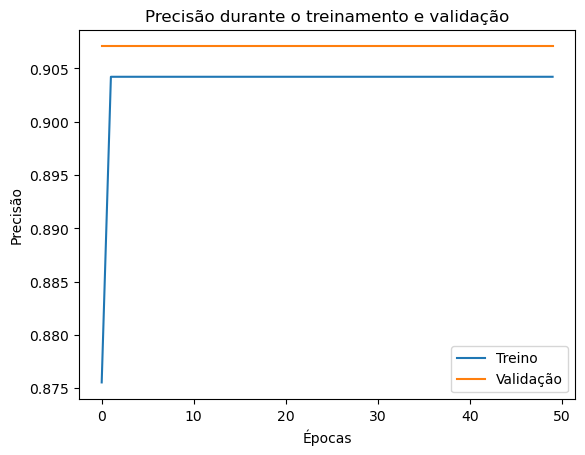

In [14]:
# Plotando as curvas de perda para identificar overfitting
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Plotando as curvas de precisão para identificar overfitting
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Precisão durante o treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Precisão')
plt.legend()
plt.show()

## Conclusão desse primeiro teste:

- Perda e Precisão constante em tese deveria ser bom, mas nesse caso ta bom demais pra ser verdade. (Teve casos q rodei q ficavam constantes).
- Tem casos q a perda cai rapidamente ou a precisão aumenta rapidamente. Também pode ser overfitting.
- Provavelmente ta com overfitting de toda forma
- Precisamos ver cross-validation e regularização, i guess
- Acho q tem fazer validação com o undersampling tbm. Fazer batches com diferentes amostras de undersampling
- Talvez testar com Oversampling também?
- Talvez precisaremos utilizar Stratified K-Folds 
- Talvez fazer Ajuste de Peso da Classe
- Depois testar com a porcentagem dos partidos também